# Meridional Structure

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
data = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v64/output052/prog.nc','r')
rhod = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v64/output052/prog_rho.nc','r')

In [3]:
yh = data.variables['yh'][:]   # heat_added
yq = data.variables['yq'][:]       
zl = data.variables['zl'][:]
t  = data.variables['Time'][:]
tr = rhod.variables['Time'][:]
ny = np.size(yq)
nz = np.size(zl)
nt = np.size(t)
ntr= np.size(tr)

In [4]:
coord = nc.Dataset('/short/v45/lxy581/mom6/input/so_mom6_v63/coord.nc','r')
rhol = coord.variables['Layer'][:]

In [5]:
vh_rho4 = rhod.variables['vh_rho'][-12:,:,:,:]
vh_rho4 = vh_rho4.filled(np.nan)
vh_rhoc = np.full((nz,ny),np.nan)

In [6]:
# time mean
vh_rho3 = np.nanmean(vh_rho4,axis=0)
# zonal integral
vh_rho2 = np.nansum(vh_rho3,axis=-1)
# vertical cumulative sum (integrate from the bottom)
vh_rhoc[:,:] = vh_rho2[::-1,...].cumsum(axis=0)[::-1,...]

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:607: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:514: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)


In [7]:
# mask vh_rhoc first few layers
for j in xrange(0,ny):
    for k in xrange(0,nz-1):
        if vh_rhoc[k,j] == vh_rhoc[k+1,j]:
            vh_rhoc[k,j] = 0.0

In [8]:
rho3 = np.zeros((1,nz,ny))
rhox = np.full((1,nz,ny),np.nan)
rhont = np.full((1,ny),np.nan)
rhomt = np.full((1,ny),np.nan)
rhon = np.zeros((1,ny))
rhom = np.zeros((1,ny))

In [9]:
h_rho3 = np.zeros((1,nz,ny))
h_rhox = np.full((1,nz,ny),np.nan)
temp3 = np.zeros((1,nz,ny))
tempx = np.full((1,nz,ny),np.nan)

In [10]:
for k in xrange(nt-73,nt):
    rho  = data.variables['rhoinsitu'][k,:,:,:]
    rhont[0,:] = np.nanmin(rho[0,:,:],axis=-1) 
    rhomt[0,:] = np.nanmax(rho[0,:,:],axis=-1)
    rhon = np.append(rhon,rhont,0)
    rhom = np.append(rhom,rhomt,0)
    rhox[0,:,:] = np.nanmean(rho,axis=-1) # zonal-mean
    #rhox[0,:,:] = data.variables['rhoinsitu'][k,:,:,0]
    rho3 = np.append(rho3,rhox,0)
    temp = data.variables['temp'][k,:,:,:]
    tempx[0,:,:] = np.nanmean(temp,axis=-1) # zonal-mean
    temp3 = np.append(temp3,tempx,0)

for k in xrange(ntr-12,ntr):
    h_rho  = rhod.variables['h_rho'][k,:,:,:]
    h_rhox[0,:,:] = np.nanmean(h_rho,axis=-1) # zonal-mean
    h_rho3 = np.append(h_rho3,h_rhox,0)

In [11]:
rho3 = rho3[1:,:,:]
rho2 = np.nanmean(rho3,axis=0)
# to be overlaid
rhon = rhon[1:,:]
rhom = rhom[1:,:]
rhon = np.nanmin(rhon,axis=0)
rhom = np.nanmax(rhom,axis=0)

temp3 = temp3[1:,:,:]
temp2 = np.nanmean(temp3,axis=0)
temp1 = temp2[0,:]

h_rho3 = h_rho3[1:,:,:]
h_rho2 = np.nanmean(h_rho3,axis=0)
h_sum  = np.nansum(h_rho2,axis=0)

heat3 = data.variables['heat_added'][-12:,:,:]
heat2 = np.nanmean(heat3,axis=0) # time-mean
heat1 = np.nanmean(heat2,axis=-1) # zonal-mean

In [12]:
forc = nc.Dataset('/short/v45/lxy581/mom6/input/so_mom6_v63/forcing.nc','r') 
x = forc.variables['x'][:]
y = forc.variables['y'][:]
sst  = forc.variables['sst'][:,0]
taux = forc.variables['taux'][:,0]

In [13]:
%matplotlib inline

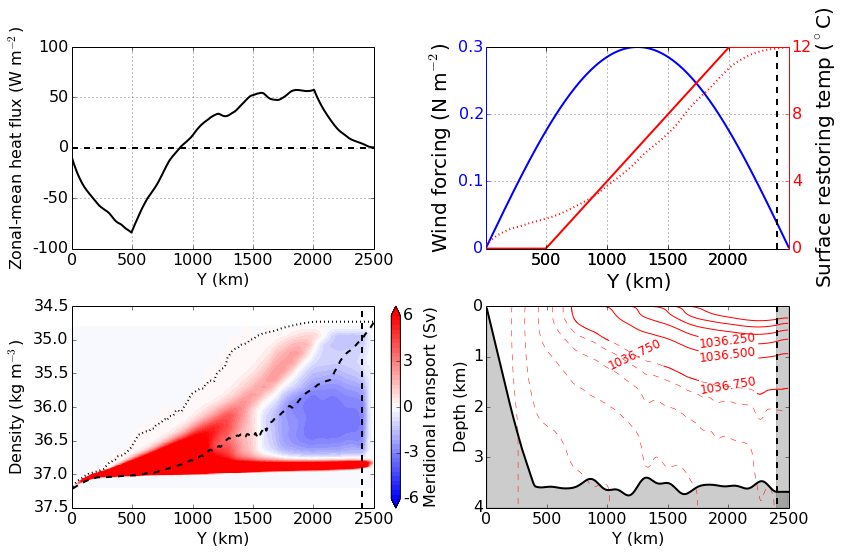

In [14]:
fig1 = plt.figure(1,figsize=(12,8))

# heat flux
plt.subplot(221)
plt.plot(yh,heat1,linewidth=2.0,color='k')
plt.plot([-1250,1250],[0,0],linewidth=2.0,linestyle='--',color='k')
plt.gca().set_xlim([-1250.0,1250.0])
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([-100,100])
plt.gca().set_yticks(np.arange(-100,100 + 50,50))
plt.gca().set_yticklabels(['-100','-50','0','50','100'])
plt.gca().set_position([0.1,0.55,0.35,0.35])
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Zonal-mean heat flux (W m$^{-2}$)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)

# wind
ax1 = fig1.add_subplot(222)
ax1.plot(y,taux,linewidth=2.0,color='b')
ax1.set_xticks(np.arange(-1250e+3,1250e+3 + 500e+3,500e+3))
ax1.set_xticklabels(['0','500','1000','1500','2000','2500'])
ax1.set_xlabel('Y (km)',fontsize=20)
ax1.set_yticks(np.arange(0,0.3+0.1,0.1))
ax1.set_yticklabels(['0','0.1','0.2','0.3'])
ax1.yaxis.set_ticks_position('left')
ax1.set_ylabel('Wind forcing (N m$^{-2}$)',fontsize=20)
ax1.yaxis.set_label_position('left')
ax1.spines['right'].set_color('red')
ax1.spines['left'].set_color('blue')
ax1.tick_params(axis='y',colors='blue',labelsize=16)
ax1.tick_params(axis='x',labelsize=16)
ax1.set_position([0.58,0.55,0.35,0.35])
ax1.grid(True)

# surface restoring temp
ax2 = fig1.add_subplot(222,sharex=ax1,frameon=False)
ax2.plot(y,sst,linewidth=2.0,color='r')
ax2.plot(y,temp1,linewidth=2.0,color='r',linestyle=':')
ax2.set_ylim(0,12)
ax2.set_yticks(np.arange(0,12+4,4))
ax2.set_yticklabels(['0','4','8','12'])
ax2.plot([1150000,1150000],[0,12],linewidth=2.0,linestyle='--',color='k')
ax2.yaxis.set_ticks_position('right')
ax2.set_ylabel('Surface restoring temp ($^\circ$C)',fontsize=20)
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='y',colors='red',labelsize=16)
ax2.tick_params(axis='x',labelsize=16)
ax2.set_position([0.58,0.55,0.35,0.35])

plt.subplot(223)
vh_level = np.arange(-6e+6,6e+6+0.3e+6,0.3e+6)
vh_ticks = np.arange(-6e+6,6e+6+3e+6,3e+6)

pc = plt.contourf(yq,rhol,vh_rhoc,cmap=plt.cm.bwr,levels=vh_level,extend='both')
plt.plot(yq,rhon,linewidth=2.0,color='k',linestyle=':')
plt.plot(yq,rhom,linewidth=2.0,color='k',linestyle='--')
plt.plot([1150,1150],[0,4000],linewidth=2.0,linestyle='--',color='k')
cb = plt.colorbar(pc,ticks=vh_ticks)
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([1034.5,1037.5])
plt.gca().set_yticks(np.arange(1034.5,1037.5 + 0.5,0.5))
plt.gca().set_yticklabels(['34.5','35.0','35.5','36.0','36.5','37.0','37.5'])
#plt.gca().set_ylim([0,4000.0])
#plt.gca().set_yticks(np.arange(0,4000.0 + 1000,1000))
#plt.gca().set_yticklabels(['1.0','2.0','3.0','4.0'])
plt.gca().invert_yaxis()
plt.gca().set_position([0.1,0.1,0.35,0.35])
cb.ax.set_position([0.47,0.1,0.03,0.35])
#cb.ax.set_yticklabels(['-16','-8','0','8','16'])
cb.ax.set_yticklabels(['-6','-3','0','3','6'])
cb.set_label('Meridional transport (Sv)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Density (kg m$^{-3}$)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(224)
r_level = np.arange(1035.5,1036.75+0.25,0.25)
r_level2 = np.arange(1036.75,1037.0+0.05,0.05)

pcr = plt.contour(yh,zl,rho2,colors='r',levels=r_level)
pcr2 = plt.contour(yh,zl,rho2,colors='r',linewidths=0.5,linestyles='dashed',levels=r_level2)
plt.plot(yh,h_sum,linewidth=2.0,color='k')
plt.plot([1150,1150],[0,4000],linewidth=2.0,linestyle='--',color='k')
plt.fill_between(yh,h_sum,4000,alpha=0.2,color='k')
plt.fill_between(yh[-11::1],0,4000,alpha=0.2,color='k')
loc_r = [(750,700),(750,1000),(750,1600),(-500,2800)]
plt.clabel(pcr,r_level[2::1],inline=1,fontsize=12,manual=loc_r)
plt.gca().invert_yaxis()
# later versions
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_yticks(np.arange(0,4000 + 1000,1000))
plt.gca().set_yticklabels(['0','1','2','3','4'])
plt.gca().set_position([0.58,0.1,0.35,0.35])
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Depth (km)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/v65_merid_y178_wdx3.png',dpi=600)

plt.show()